# Breast Cancer

In [226]:
import numpy as np
import pandas as pd
import seaborn as sns
import pydot
from matplotlib import pyplot as plt
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense,Activation,Layer,Lambda
from keras.utils import plot_model
from sklearn.cross_validation import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
%matplotlib inline

In [227]:
data = pd.read_csv("data.csv")

In [228]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [229]:
columns=data.columns
print(columns)

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')


In [230]:
data.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [231]:
data.drop('id', axis=1, inplace = True)
data.drop('Unnamed: 32', axis=1, inplace = True)

In [232]:
data.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [233]:
data.diagnosis.unique()

array(['M', 'B'], dtype=object)

In [234]:
data.describe(include=['object'])

,diagnosis
count,569
unique,2
top,B
freq,357


In [235]:
data.groupby('diagnosis').agg(['min','max','mean'])

radius_mean                   texture_mean                    \
                  min    max       mean          min    max       mean   
diagnosis                                                                
B               6.981  17.85  12.146524         9.71  33.81  17.914762   
M              10.950  28.11  17.462830        10.38  39.28  21.604906   

          perimeter_mean                    area_mean                      \
                     min    max        mean       min     max        mean   
diagnosis                                                                   
B                  43.79  114.6   78.075406     143.5   992.1  462.790196   
M                  71.90  188.5  115.365377     361.6  2501.0  978.376415   

          smoothness_mean                   compactness_mean          \
                      min     max      mean              min     max   
diagnosis                                                              
B                 0.05263  0.1634  0.092478          0.01938  0.2239   
M                 0.07371  0.1447  0.102898          0.04605  0.3454   

                    concavity_mean                   concave points_mean  \
               mean            min     max      mean                 min   
diagnosis                                                                  
B          0.080085        0.00000  0.4108  0.046058             0.00000   
M          0.145188        0.02398  0.4268  0.160775             0.02031   

                             symmetry_mean                    \
               max      mean           min     max      mean   
diagnosis                                                      
B          0.08534  0.025717        0.1060  0.2743  0.174186   
M          0.20120  0.087990        0.1308  0.3040  0.192909   

          fractal_dimension_mean                    radius_se          \
                             min      max      mean       min     max   
diagnosis                                                               
B                        0.05185  0.09575  0.062867    0.1115  0.8811   
M                        0.04996  0.09744  0.062680    0.1938  2.8730   

                    texture_se                  perimeter_se          \
               mean        min    max      mean          min     max   
diagnosis                                                              
B          0.284082     0.3602  4.885  1.220380        0.757   5.118   
M          0.609083     0.3621  3.568  1.210915        1.334  21.980   

                    area_se                    smoothness_se           \
               mean     min     max       mean           min      max   
diagnosis                                                               
B          2.000321   6.802   77.11  21.135148      0.001713  0.02177   
M          4.323929  13.990  542.20  72.672406      0.002667  0.03113   

                    compactness_se                   concavity_se          \
               mean            min     max      mean          min     max   
diagnosis                                                                   
B          0.007196       0.002252  0.1064  0.021438      0.00000  0.3960   
M          0.006780       0.008422  0.1354  0.032281      0.01101  0.1438   

                    concave points_se                    symmetry_se           \
               mean               min      max      mean         min      max   
diagnosis                                                                       
B          0.025997          0.000000  0.05279  0.009858    0.009539  0.06146   
M          0.041824          0.005174  0.04090  0.015060    0.007882  0.07895   

                    fractal_dimension_se                    radius_worst  \
               mean                  min      max      mean          min   
diagnosis                                                                  
B          0.020584             0.000895  0.02984  0.003636         7.93   
M

In [236]:
d = {'M' : 1, 'B' : 0}
data['diagnosis'] = data['diagnosis'].map(d)

In [237]:
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [238]:
features_mean=list(data.columns[1:31])
# split dataframe into two based on diagnosis
dataM=data[data['diagnosis'] ==1]
dataB=data[data['diagnosis'] ==0]

## Feature histograms

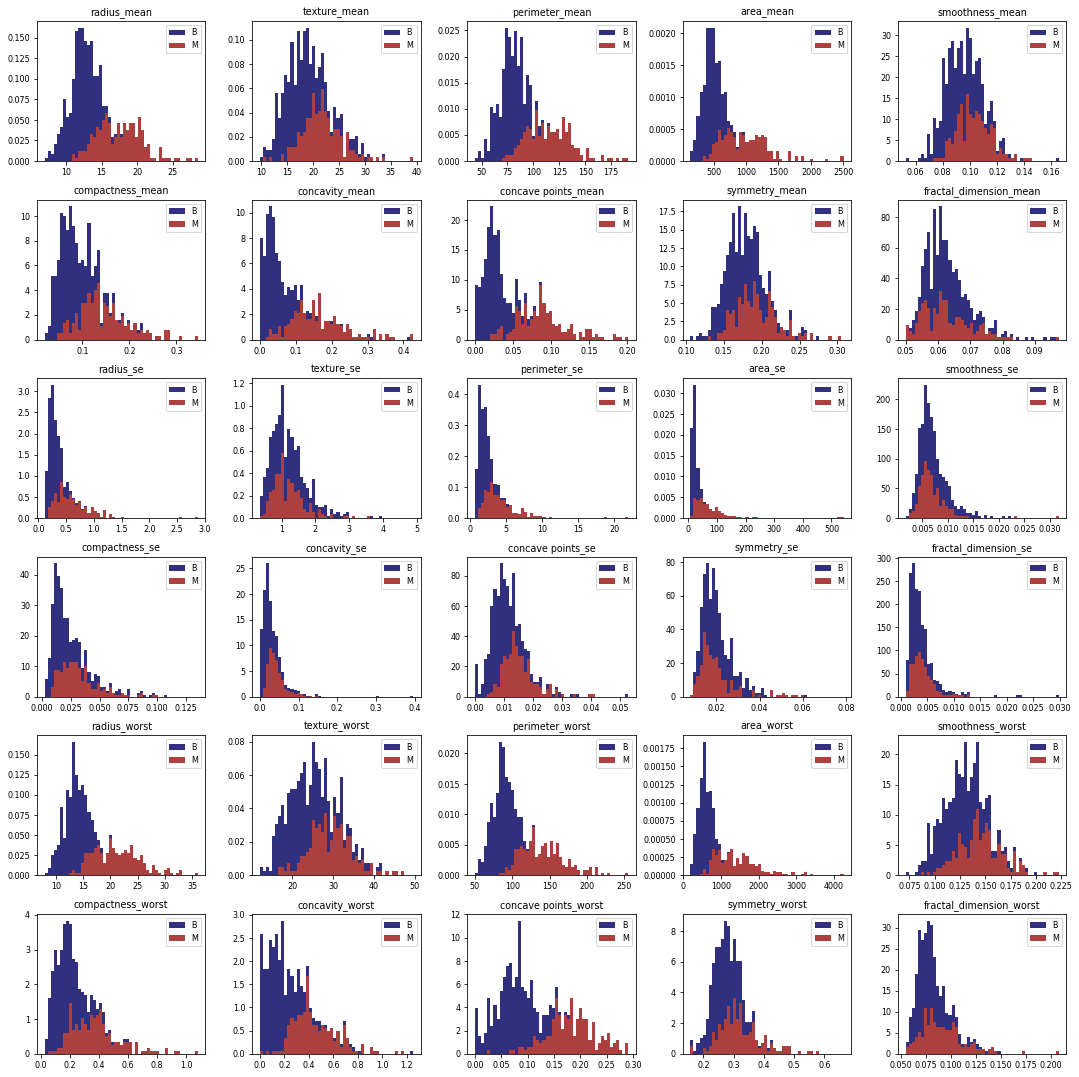

In [239]:
plt.rcParams.update({'font.size': 8})
fig, axes = plt.subplots(nrows=6, ncols=5, figsize=(15,15))
axes = axes.ravel()
for idx,ax in enumerate(axes):
    ax.figure
    binwidth= (max(data[features_mean[idx]]) - min(data[features_mean[idx]]))/50
    ax.hist([dataM[features_mean[idx]],dataB[features_mean[idx]]], bins=np.arange(min(data[features_mean[idx]]), max(data[features_mean[idx]]) + binwidth, binwidth) , alpha=0.9,stacked=True, density = True, label=['M','B'],color=['brown','midnightblue'], histtype= 'stepfilled')
    ax.legend(loc='upper right')
    ax.set_title(features_mean[idx])
plt.tight_layout()
plt.show()

## Correlation Map

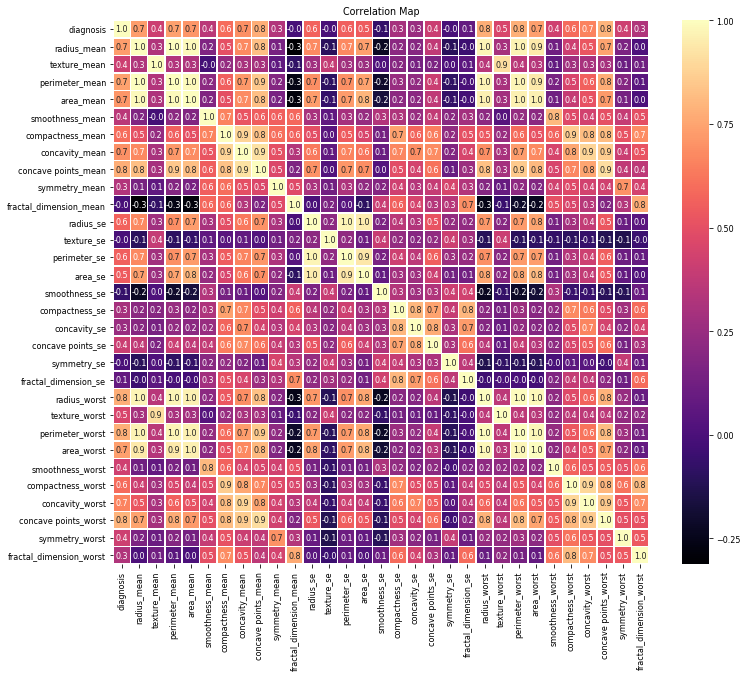

In [240]:
f,ax=plt.subplots(figsize = (12,10))
sns.heatmap(data.corr(),cmap="magma",annot= True,linewidths=0.5,fmt = ".1f",ax=ax)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.title('Correlation Map')
plt.show()

In [241]:
target = data['diagnosis']
fea_data = data.drop('diagnosis', axis=1)

## Dimensionality reduction

In [242]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [243]:
X = fea_data.values

# Invoke the PCA method. Since this is a binary classification problem
# let's call n_components = 2
pca = PCA(n_components=2)
pca_2d = pca.fit_transform(X)

# Invoke the TSNE method
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=2000)
tsne_results = tsne.fit_transform(X)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 569 samples in 0.001s...
[t-SNE] Computed neighbors for 569 samples in 0.024s...
[t-SNE] Computed conditional probabilities for sample 569 / 569
[t-SNE] Mean sigma: 33.679705
[t-SNE] KL divergence after 250 iterations with early exaggeration: 49.267979
[t-SNE] Error after 2000 iterations: 0.209568


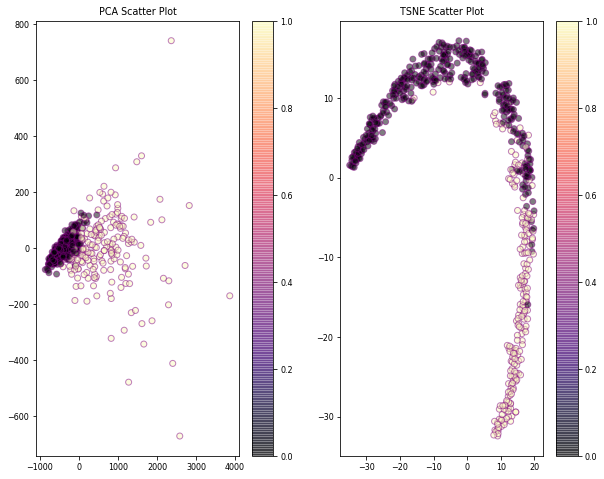

In [244]:
plt.figure(figsize = (10,8))
plt.subplot(121)
plt.scatter(pca_2d[:,0],pca_2d[:,1], c = target, 
            cmap = "magma", edgecolor = "purple", alpha=0.5)
plt.colorbar()
plt.title('PCA Scatter Plot')
plt.subplot(122)
plt.scatter(tsne_results[:,0],tsne_results[:,1],  c = target, 
            cmap = "magma", edgecolor = "purple", alpha=0.5)
plt.colorbar()
plt.title('TSNE Scatter Plot')
plt.show()

In [245]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)

In [246]:
pca = PCA(n_components=2)
pca_2d_std = pca.fit_transform(X_std)

# Invoke the TSNE method
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=2000)
tsne_results_std = tsne.fit_transform(X_std)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 569 samples in 0.001s...
[t-SNE] Computed neighbors for 569 samples in 0.041s...
[t-SNE] Computed conditional probabilities for sample 569 / 569
[t-SNE] Mean sigma: 1.522404
[t-SNE] KL divergence after 250 iterations with early exaggeration: 65.555923
[t-SNE] Error after 1750 iterations: 0.904809


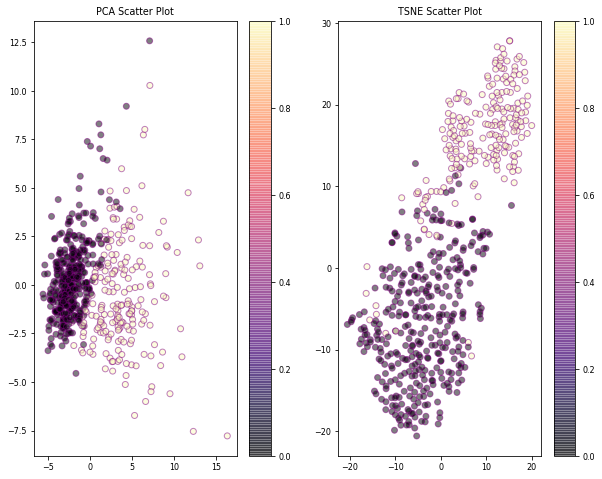

In [247]:
plt.figure(figsize = (10,8))
plt.subplot(121)
plt.scatter(pca_2d_std[:,0],pca_2d_std[:,1], c = target, 
            cmap = "magma", edgecolor = "purple", alpha=0.5)
plt.colorbar()
plt.title('PCA Scatter Plot')
plt.subplot(122)
plt.scatter(tsne_results_std[:,0],tsne_results_std[:,1],  c = target, 
            cmap = "magma", edgecolor = "purple", alpha=0.5)
plt.colorbar()
plt.title('TSNE Scatter Plot')
plt.show()

# Deep Learning TENSORFLOW 

In [248]:
train_data = data

In [249]:
train_data.loc[train_data.diagnosis == 0, 'benign'] = 1
train_data.loc[train_data.diagnosis == 1, 'benign'] = 0
train_data['benign'] = train_data.benign.astype(int)
train_data = train_data.rename(columns={'diagnosis': 'malignant'})

print(train_data.benign.value_counts())
print()
print(train_data.malignant.value_counts())

pd.set_option("display.max_columns",101)
train_data.head()

1    357
0    212
Name: benign, dtype: int64

0    357
1    212
Name: malignant, dtype: int64


,malignant,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,benign
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [253]:
Malignant = train_data[train_data.malignant == 1]
Benign = train_data[train_data.benign == 1]

train_X = Malignant.sample(frac=0.8)
count_Malignants = len(train_X)
train_X = pd.concat([train_X, Benign.sample(frac = 0.8)], axis = 0)
test_X = train_data.loc[~train_data.index.isin(train_X.index)]
#train_X = shuffle(train_X)
#test_X = shuffle(test_X)

train_Y = train_X.malignant
train_Y = pd.concat([train_Y, train_X.benign], axis=1)

test_Y = test_X.malignant
test_Y = pd.concat([test_Y, test_X.benign], axis=1)

train_X = train_X.drop(['malignant','benign'], axis = 1)
test_X = test_X.drop(['malignant','benign'], axis = 1)

print(len(train_X))
print(len(train_Y))
print(len(test_X))
print(len(test_Y))

features = train_X.columns.values
for feature in features:
    mean, std = train_data[feature].mean(), train_data[feature].std()
    train_X.loc[:, feature] = (train_X[feature] - mean) / std
    test_X.loc[:, feature] = (test_X[feature] - mean) / std
    
learning_rate = 0.005
training_dropout = 0.9
display_step = 1
training_epochs = 5
batch_size = 100
accuracy_history = [] 
cost_history = []
valid_accuracy_history = [] 
valid_cost_history = [] 

input_nodes = train_X.shape[1]

num_labels = 2
split = int(len(test_Y)/2)

train_size = train_X.shape[0]
n_samples = train_Y.shape[0]

input_X = train_X.as_matrix()
input_Y = train_Y.as_matrix()
input_X_valid = test_X.as_matrix()[:split]
input_Y_valid = test_Y.as_matrix()[:split]
input_X_test = test_X.as_matrix()[split:]
input_Y_test = test_Y.as_matrix()[split:]

def calculate_hidden_nodes(nodes):
    return (((2 * nodes)/3) + num_labels)

hidden_nodes1 = round(calculate_hidden_nodes(input_nodes))
hidden_nodes2 = round(calculate_hidden_nodes(hidden_nodes1))
hidden_nodes3 = round(calculate_hidden_nodes(hidden_nodes2))

print(input_nodes, hidden_nodes1, hidden_nodes2, hidden_nodes3)

pkeep = tf.placeholder(tf.float32)

x = tf.placeholder(tf.float32, [None, input_nodes])


456
456
113
113
30 22 17 13


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:49: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:50: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:51: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:52: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:53: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:54: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


In [268]:
W1 = tf.Variable(tf.truncated_normal([input_nodes, hidden_nodes1], stddev = 0.1))
b1 = tf.Variable(tf.zeros([hidden_nodes1]))
y1 = tf.nn.relu(tf.matmul(x, W1) + b1)

W2 = tf.Variable(tf.truncated_normal([hidden_nodes1, hidden_nodes2], stddev = 0.1))
b2 = tf.Variable(tf.zeros([hidden_nodes2]))
y2 = tf.nn.relu(tf.matmul(y1, W2) + b2)

W3 = tf.Variable(tf.truncated_normal([hidden_nodes2, hidden_nodes3], stddev = 0.1)) 
b3 = tf.Variable(tf.zeros([hidden_nodes3]))
y3 = tf.nn.relu(tf.matmul(y2, W3) + b3)
y3 = tf.nn.dropout(y3, pkeep)

W4 = tf.Variable(tf.truncated_normal([hidden_nodes3, 2], stddev = 0.1)) 
b4 = tf.Variable(tf.zeros([2]))
y4 = tf.nn.softmax(tf.matmul(y3, W4) + b4)

y = y4
y_ = tf.placeholder(tf.float32, [None, num_labels]) 

cost = -tf.reduce_sum(y_ * tf.log(y))

optimizer = tf.train.AdamOptimizer(learning_rate).minimize(cost)

correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))

accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

init = tf.global_variables_initializer()


with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    for epoch in range(training_epochs): 
        for batch in range(int(n_samples/batch_size)):
            batch_x = input_X[batch * batch_size : (1 + batch) * batch_size]
            batch_y = input_Y[batch * batch_size : (1 + batch) * batch_size]

            sess.run([optimizer], feed_dict={x: batch_x, 
                                             y_: batch_y,
                                             pkeep: training_dropout})

        # Display logs after every 10 epochs
        if (epoch) % display_step == 0:
            train_accuracy, newCost = sess.run([accuracy, cost], 
                                               feed_dict={x: input_X, y_: input_Y, 
                                                          pkeep: training_dropout})

            valid_accuracy, valid_newCost = sess.run([accuracy, cost], 
                                                     feed_dict={x: input_X_valid, 
                                                                y_: input_Y_valid, pkeep: 1})

            print ("Epoch:", epoch, "Acc =", "{:.5f}".format(train_accuracy), 
                   "Cost =", "{:.5f}".format(newCost), 
                   "Valid_Acc =", "{:.5f}".format(valid_accuracy), 
                   "Valid_Cost = ", "{:.5f}".format(valid_newCost))
            
            # Record the results of the model
            accuracy_history.append(train_accuracy)
            cost_history.append(newCost)
            valid_accuracy_history.append(valid_accuracy)
            valid_cost_history.append(valid_newCost)
            
            # If the model does not improve after 15 logs, stop the training.
            if valid_accuracy < max(valid_accuracy_history) and epoch > 100:
                stop_early += 1
                if stop_early == 50:
                    break
            else:
                stop_early = 0
            
    

Epoch: 0 Acc = 0.65570 Cost = 313.85297 Valid_Acc = 0.80357 Valid_Cost =  38.42108
Epoch: 1 Acc = 0.90570 Cost = 305.85248 Valid_Acc = 0.87500 Valid_Cost =  37.60261
Epoch: 2 Acc = 0.95175 Cost = 287.87616 Valid_Acc = 0.92857 Valid_Cost =  35.83978
Epoch: 3 Acc = 0.94518 Cost = 254.33250 Valid_Acc = 0.94643 Valid_Cost =  32.62217
Epoch: 4 Acc = 0.95175 Cost = 204.02040 Valid_Acc = 0.94643 Valid_Cost =  27.73249


# Deep Learning KERAS

In [255]:
X = fea_data.values
y = target.valßßßues
labelencoder_X_1 = LabelEncoder()
y = labelencoder_X_1.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 0)

In [256]:
classifier = Sequential()
classifier.add(Dense(output_dim=16, init='uniform', activation='relu', input_dim=30))
classifier.add(Dense(output_dim=16, init='uniform', activation='relu'))
classifier.add(Dense(output_dim=1, init='uniform', activation='sigmoid'))
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
classifier.fit(X_train, y_train, batch_size=400, nb_epoch=400)


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=30, units=16, kernel_initializer="uniform")`
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=16, kernel_initializer="uniform")`
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  after removing the cwd from sys.path.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Epoch 1/400
512/512 [==============================] - 1s 2ms/step - loss: 0.7093 - acc: 0.6289
Epoch 2/400
512/512 [==============================] - 0s 16us/step - loss: 0.6908 - acc: 0.6387
Epoch 3/400
512/512 [==============================] - 0s 17us/step - loss: 0.6824 - acc: 0.7793
Epoch 4/400
512/512 [==============================] - 0s 14us/step - loss: 0.6757 - acc: 0.3809
Epoch 5/400
512/512 [==============================] - 0s 20us/step - loss: 0.6697 - acc: 0.3770
Epoch 6/400
512/512 [==============================] - 0s 20us/step - loss: 0.6643 - acc: 0.3945
Epoch 7/400
512/512 [==============================] - 0s 18us/step - loss: 0.6588 - acc: 0.4102
Epoch 8/400
512/512 [==============================] - 0s 19us/step - loss: 0.6528 - acc: 0.4238
Epoch 9/400
512/512 [==============================] - 0s 17us/step - loss: 0.6454 - acc: 0.4961
Epoch 10/400
512/512 [==============================] - 0s 25us/step - loss: 0.6372 - acc: 0.6719
Epoch 11/400
512/512 [========

512/512 [==============================] - 0s 22us/step - loss: 0.1687 - acc: 0.9258
Epoch 168/400
512/512 [==============================] - 0s 22us/step - loss: 0.1675 - acc: 0.9277
Epoch 169/400
512/512 [==============================] - 0s 21us/step - loss: 0.1673 - acc: 0.9258
Epoch 170/400
512/512 [==============================] - 0s 25us/step - loss: 0.1660 - acc: 0.9258
Epoch 171/400
512/512 [==============================] - 0s 20us/step - loss: 0.1658 - acc: 0.9297
Epoch 172/400
512/512 [==============================] - 0s 28us/step - loss: 0.1673 - acc: 0.9258
Epoch 173/400
512/512 [==============================] - 0s 19us/step - loss: 0.1646 - acc: 0.9316
Epoch 174/400
512/512 [==============================] - 0s 16us/step - loss: 0.1689 - acc: 0.9336
Epoch 175/400
512/512 [==============================] - 0s 19us/step - loss: 0.1650 - acc: 0.9277
Epoch 176/400
512/512 [==============================] - 0s 28us/step - loss: 0.1663 - acc: 0.9258
Epoch 177/400
512/512 [=

512/512 [==============================] - 0s 20us/step - loss: 0.1395 - acc: 0.9453
Epoch 332/400
512/512 [==============================] - 0s 21us/step - loss: 0.1365 - acc: 0.9414
Epoch 333/400
512/512 [==============================] - 0s 19us/step - loss: 0.1357 - acc: 0.9434
Epoch 334/400
512/512 [==============================] - 0s 16us/step - loss: 0.1402 - acc: 0.9434
Epoch 335/400
512/512 [==============================] - 0s 19us/step - loss: 0.1392 - acc: 0.9453
Epoch 336/400
512/512 [==============================] - 0s 19us/step - loss: 0.1368 - acc: 0.9453
Epoch 337/400
512/512 [==============================] - 0s 26us/step - loss: 0.1332 - acc: 0.9453
Epoch 338/400
512/512 [==============================] - 0s 24us/step - loss: 0.1366 - acc: 0.9414
Epoch 339/400
512/512 [==============================] - 0s 20us/step - loss: 0.1358 - acc: 0.9453
Epoch 340/400
512/512 [==============================] - 0s 17us/step - loss: 0.1363 - acc: 0.9453
Epoch 341/400
512/512 [=